![Example image](https://upload.wikimedia.org/wikipedia/commons/0/02/Northeastern_Wordmark.svg)

# Neural Network

Copyright: Prof. Shanu Sushmita

In [1]:
#Ensure you have TensorFlow installed (pip install tensorflow) to execute this code. 
import numpy as np
import tensorflow as tf 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model

In [ ]:
#conda install -c conda-forge pydot
#conda install -c conda-forge graphviz

#### Lets build NN for this input matrix
$$
\begin{bmatrix}
x_1 & x_2 & x_3 & y\\
0 & 0 & 1 & 0  \\
1 & 1 & 1 & 1  \\
1 & 0 & 1 & 1 \\
0 & 1 & 1 & 0 \\
\end{bmatrix}
$$

In [9]:
# Define the input and output data
training_set_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
training_set_outputs = np.array([[0, 1, 1, 0]]).T


In [10]:
# Define the neural network architecture
model_test = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
# Compile the model
model_test.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
# Train the model
model_test.fit(training_set_inputs, training_set_outputs, epochs=1000, batch_size=4, verbose=0)


In [17]:
# Test the model with new data
test_data = np.array([[0, 0, 0], [1, 1, 0], [1, 0, 0], [0, 1, 0]])
predictions = model_test.predict(test_data)

1/1 [==============================] - 0s 10ms/step


In [18]:
print("Predictions:")
print(predictions)

Predictions:
[[0.3224965 ]
 [0.9922352 ]
 [0.97506034]
 [0.6429629 ]]


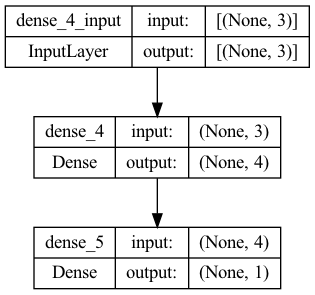

In [21]:
# Visualize the model architecture
plot_model(model_test, show_shapes=True, show_layer_names=True)


## Lets build neural network with
* 2 hidden layer, 
* Sigmoid function, 
* Synthetic data
* Binary classification problem

In [2]:
# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [7]:
# Visualize the model architecture
def visualize_model(model):
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


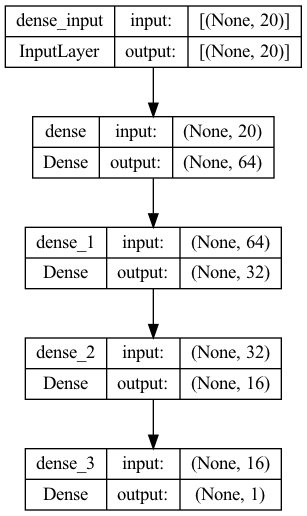

In [8]:
# Visualize the model architecture
plot_model(model, to_file='architecture.png', show_shapes=True, show_layer_names=True)


In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
23/23 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.4917 - val_loss: 0.6885 - val_accuracy: 0.5750
Epoch 2/20
23/23 [==============================] - 0s 873us/step - loss: 0.6893 - accuracy: 0.5681 - val_loss: 0.6803 - val_accuracy: 0.7125
Epoch 3/20
23/23 [==============================] - 0s 930us/step - loss: 0.6782 - accuracy: 0.5903 - val_loss: 0.6674 - val_accuracy: 0.7000
Epoch 4/20
23/23 [==============================] - 0s 899us/step - loss: 0.6651 - accuracy: 0.7542 - val_loss: 0.6520 - val_accuracy: 0.8500
Epoch 5/20
23/23 [==============================] - 0s 926us/step - loss: 0.6435 - accuracy: 0.8208 - val_loss: 0.6232 - val_accuracy: 0.8250
Epoch 6/20
23/23 [==============================] - 0s 907us/step - loss: 0.6111 - accuracy: 0.8306 - val_loss: 0.5836 - val_accuracy: 0.8500
Epoch 7/20
23/23 [==============================] - 0s 955us/step - loss: 0.5669 - accuracy: 0.8347 - val_loss: 0.5296 - val_accuracy: 0.8500
Epoch 8/

In [8]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 0s 634us/step - loss: 0.3635 - accuracy: 0.8750
Test Loss: 0.3635256290435791
Test Accuracy: 0.875


In [13]:
#!pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.2 MB/s eta 0:00:00


In [14]:
#!pip install pydot

  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/7f/90/c9b51f3cdff89cd8f93382060330f43d1af098a6624cff439e700791e922/pydot-2.0.0-py3-none-any.whl.metadata
